#Predicting Airbnb Rental Prices

##Pratik Vijayakar (ppv225)

In [0]:
import nltk
!pip install textblob
nltk.download('wordnet')
nltk.download('brown')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
!pip install BeautifulSoup4
!pip install boruta


In [0]:
import pandas as pd
import numpy as np
from collections import OrderedDict, defaultdict

from textblob import TextBlob
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer

import math
from math import sin, cos, sqrt, atan2, radians
import json
import urllib2
import requests
from bs4 import BeautifulSoup
from sklearn import preprocessing
from sklearn.decomposition import PCA

from collections import Counter
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

# Reading the csv file into Dataframe

###Data source :-  http://insideairbnb.com/get-the-data.html


In [0]:
df = pd.read_csv("listings.csv", index_col='id',low_memory=False)
df.reset_index(drop=True, inplace=True)
df

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,https://www.airbnb.com/rooms/2818,20181005150751,2018-10-05,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi,I'm renting a bedroom (room overlooking the ga...,Quiet Garden View Room & Super Fast WiFi I'm r...,none,"Indische Buurt (""Indies Neighborhood"") is a ne...",From week 38 to week 47 maintenance work to th...,...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.10
1,https://www.airbnb.com/rooms/3209,20181005150751,2018-10-05,"Quiet apt near center, great view",You will love our spacious (90 m2) bright apar...,"Our apartment has lots of light, a balcony and...",You will love our spacious (90 m2) bright apar...,none,Welcome to the Spaarndammerbuurt! From the beg...,NaN,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,1.08
2,https://www.airbnb.com/rooms/20168,20181005150751,2018-10-05,100%Centre-Private Floor/Bathroom-Lockable Studio,"Cozy, very private and on your own private flo...",For those who like all facets of city life. In...,"Cozy, very private and on your own private flo...",none,Located just in between famous central canals....,Check-in time from 2pm till 10pm Checkout anyt...,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,2.11
3,https://www.airbnb.com/rooms/25428,20181005150751,2018-10-05,Lovely apt in City Centre (Jordaan),NaN,"This nicely furnished, newly renovated apt is...","This nicely furnished, newly renovated apt is...",none,NaN,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,0.12
4,https://www.airbnb.com/rooms/27886,20181005150751,2018-10-05,"Romantic, stylish B&B houseboat in canal district",Stylish and romantic houseboat on fantastic hi...,For a romantic couple: A beautifully restored ...,Stylish and romantic houseboat on fantastic hi...,none,"Central, quiet, safe, clean and beautiful.","we have a canadian canoe for you as well, free...",...,f,NaN,{Amsterdam},t,f,strict_14_with_grace_period,f,f,1,2.00
5,https://www.airbnb.com/rooms/28658,20181005150751,2018-10-05,Cosy guest room near city centre -1,2 beds guest room in Amsterdam West near Erasm...,Cosy small but comfortable guest room with twi...,2 beds guest room in Amsterdam West near Erasm...,none,"The listing is located in Amsterdam west, betw...",- When making a reservation please send a mess...,...,f,NaN,{Amsterdam},f,f,moderate,t,t,2,4.17
6,https://www.airbnb.com/rooms/28871,20181005150751,2018-10-05,Comfortable double room,NaN,In a monumental house right in the center of A...,In a monumental house right in the center of A...,none,NaN,NaN,...,f,NaN,{Amsterdam},f,f,moderate,f,f,3,2.01
7,https://www.airbnb.com/rooms/29051,20181005150751,2018-10-05,Comfortable single room,because of the city imposing a 4 paying guest ...,In a monumental house right in the center of A...,because of the city imposing a 4 paying guest ...,none,NaN,NaN,...,f,NaN,{Amsterdam},f,f,moderate,f,f,3,3.99
8,https://www.airbnb.com/rooms/29554,20181005150751,2018-10-05,cosy jordaan located apartment,NaN,The apartment A traditional Dutch architectura...,The apartment A traditional Dutch architectura...,none,NaN,NaN,...,f,NaN,{Amsterdam},f,f,strict_14_with_grace_period,f,f,2,1.10
9,https://www.airbnb.com/rooms/31080,20181005150751,2018-10-05,2-story apartment + rooftop terrace,NaN,My apartment is light and cosy. The three bed...,My apartment is light and cosy. The three bed...,none,NaN,Amsterdam and its surroundings are best explor...,...,f,NaN,{Amsterdam},f,f,moderate,f,f,1,0.37


#Feature Engineering

### Selecting the features which can be relevant to our prediction and ignoring the features which have primary key values(distinct for every feature) , images or sparse data. Also, Nan values in features security_deposit and cleaning_fee were replaced by 0 since it indicates that  there is no initial security deposit or cleaning fee involved.


In [0]:
null_columns=df.columns[df.isnull().any()]
nan_cnt = (df[null_columns].isnull().sum()).to_dict()
col_names = list(df)

more_than_half_nan_cols = []
for col in col_names:
  if nan_cnt.get(col,0) > 0.5*df.shape[0]:
    more_than_half_nan_cols.append(col)
df = df.drop(columns=more_than_half_nan_cols)

df = df[['name','space','neighborhood_overview','street','transit','neighbourhood_cleansed','zipcode','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included',]]
df["security_deposit"].fillna(0, inplace = True)
df["cleaning_fee"].fillna(0, inplace = True)

df.shape

(19930, 21)

###Deleting the listings where the count of beds and bathrooms is either Nan or 0 because that means that there is the listing is not valid or wrong entry
###Filling feature bedrooms with Nan by 0, since it might indicate no bedroom (For eg. Studio apartment, etc.)

In [0]:
df = df[np.isfinite(df['beds'])]
df = df[np.isfinite(df['bathrooms'])]
df[['bedrooms']] = df[['bedrooms']].fillna(value=0)
df = df.drop(columns=['space','zipcode','neighborhood_overview','neighbourhood_cleansed'])

### Deriving a new feature (amenities count) from the available feature, amenities by counting how many amenities are available per listing

In [0]:
amenities_count = []
amenities = list(df.amenities)
for ele in amenities:
  element = eval(json.dumps(ele))
  amenities_count.append(ele.count(',')+1)
df['amenities_count'] = amenities_count
del df['amenities']

###Getting a set of all means of transport by scraping from a website , getting the root word for it by using Textblob corrector , stemming and lemmatizing and then generating a set corresponding to it.

In [0]:
all_means_of_transport = []
raw_html = open('fds_scrape_vehicles.html').read()
html = BeautifulSoup(raw_html, 'html.parser')
for div in html.find_all('div', attrs={'class':'words'}):    
    for anc in div.find_all('a'):
      t = str(TextBlob(str(anc.contents[0])).correct())
      t = lemmatizer.lemmatize(t)
      t = ps.stem(t)
      
      all_means_of_transport.append(str(t))
all_means_of_transport =set(all_means_of_transport)

      

### Noun extraction from a given sentence

In [0]:
def extract_NN(sent):
    grammar = r"""
    NBAR:
        # Nouns and Adjectives, terminated with Nouns
        {<NN.*>*<NN.*>}

    NP:
        {<NBAR>}
        # Above, connected with in/of/etc...
        {<NBAR><IN><NBAR>}
    """
    chunker = nltk.RegexpParser(grammar)
    ne = set()
    chunk = chunker.parse(nltk.pos_tag(nltk.word_tokenize(sent)))
    for tree in chunk.subtrees(filter=lambda t: t.label() == 'NP'):
        ne.add(' '.join([child[0] for child in tree.leaves()]))
    return ne

### Extracting the count of transit options from transit feature by Noun extraction and the comparing it with the set containing all means of transport  to find out how many transit options are available for a listing

In [0]:
transit_list = []
df.transit = df.transit.astype(str)
for value in df.transit:
  transit_count = 0
  if value:
    s = extract_NN((value).decode('utf-8').strip())
    transit_count += len(set(s).intersection(all_means_of_transport))
    transit_list.append(transit_count)
  else:
    transit_list.append(float('nan'))

df['transit_count']=transit_list

###Finding distance between two locations based on latitude and longitude

In [0]:

def distance(lat1,lon1,lat2,lon2):
  R = 6373.0    # approximate radius of earth in km


  lat1 = radians(lat1)
  lon1 = radians(lon1)
  lat2 = radians(lat2)
  lon2 = radians(lon2)

  dlon = abs(lon2 - lon1)
  dlat = abs(lat2 - lat1)

  a = sin(dlat / 2.0)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2.0)**2
  c = 2 * atan2(sqrt(a), sqrt(1 - a))

  dist = R * c

  return dist

###Filling the Nan values in transit feature : 
###To do this we find all listings which are within 0.5km radius of that listing and then we create a list of the transit counts of those nearby listings and fill Nan by the value occuring most frequent in the list

In [0]:
threshold_dist = 0.5

df.reset_index(drop=True, inplace=True)

latitude= df.latitude
longitude= df.longitude
transit_count= df.transit_count



for i in range(len(transit_count)):
  
  avg_transit_cnt = 0
  avg_transit_cnt_list = []
  
  if transit_count[i] == 0:
    
    for j in range(len(transit_count)):
      if transit_count[j] > 0:
        d = distance(latitude[i],longitude[i],latitude[j],longitude[j])
        if d < threshold_dist:
          avg_transit_cnt_list.append(d)
    if len(avg_transit_cnt_list)==0:
      avg_transit_cnt=0
    else:
      avg_transit_cnt = Counter(avg_transit_cnt_list).most_common(1)[0][0]
    transit_count[i]=avg_transit_cnt
    
df['transit_count'] = transit_count
        
    

###After extracting relevant information, the corresponding features latitude, longitude ,transit are dropped. Whereas the features security deposit, cleaning fee and guests_included had a low correlation with the target variable price , so those were dropped as well

In [0]:
df = df.drop(columns=['latitude','longitude','security_deposit','transit','cleaning_fee','guests_included'])

### Converting price feature from string to float. So that the value can be used as the target variable while regression

In [0]:
l = []
for ele in df.price:
  l.append(float(ele.strip().replace("$", "").replace(",", "")))
df['price'] = l
df['price'] = df.pop('price')

### The neighbourhood and locality of the listing also influences its price.
###We initially created a set containing words corresponding to vicinity like mountains, scenery, swimming pool, etc.

In [0]:
all_vicinity =[]

raw_html = []
html = []

raw_html.append(open('fds_scrape_mountain.html').read())
raw_html.append(open('fds_scrape_scenery.html').read())
raw_html.append(open('fds_scrape_sea.html').read())
raw_html.append(open('fds_scrape_swimming_pool.html').read())

for i in range(len(raw_html)):
  html.append(BeautifulSoup(raw_html[i], 'html.parser'))
  
for i in range(len(html)):
  for div in html[i].find_all('div', attrs={'class':'words'}):    
      for anc in div.find_all('a'):
        t = (anc.contents[0])
        all_vicinity.append(t.encode('utf-8').strip())
all_vicinity =set(all_vicinity)

###The feature, name had information about the scenery or vicinity of the listing. So we first extracted all the vicinity information by extracting Nouns from the feature, name . Then finding the words common between the nouns extracted and the so created set all_vicinity (which contains all words related to vicinity). The new feature vicinity countains the count of the common words.

In [0]:
df.name.fillna(value=0, inplace=True)

vicinity_list = []
df.name = df.name.astype(str)
for value in df.name:
  vicinity_count = 0
  if value:
    s = extract_NN((value).decode('utf-8').strip())
    vicinity_count += len(set(s).intersection(vicinity))
    vicinity_list.append(vicinity_count)
  else:
    vicinity_list.append(float('0'))
    
df['vicinity'] = vicinity_list
del df['name']
df['price']=df.pop('price')


###To apply one hot encoding and subsequently PCA, we had to convert nominal data of features - street, property_type, room_type, bed_type to categorical data.

In [0]:
df_categorical_columns = df[['street','property_type','room_type','bed_type']]
le = preprocessing.LabelEncoder()
cols = list(df_categorical_columns)
for col in cols:
  df_categorical_columns[col] = le.fit_transform(df_categorical_columns[col].astype('str'))


### Outlier Filtering - Deleting listings with spurious feature values
###Here we find the distance of the listing from other listings and find the k nearest listings. Then we sort the prices of those k neighbours and check if the current listing lies in the middle 80% portion(between 10th and 90th percentile) . If it does not lie then we consider the listing to be spurious and delete it

In [0]:
outlier_rows = []
k = (df.shape[0])**(0.5)/2.0
for index,row in df.iterrows():
  dist = []
  for index1,row1 in df.iterrows():
    d = (row.iloc[:,-1] - row1.iloc[:,-1]).sum(1).pow(0.5)
    dist.append(d)
  df['distance'] = dist
  dist.sort()
  vals = set(dist[:k])
  neighbours = df[df['distance'].isin(vals)]
  neighbours_cost = neighbours['price']
  l = len(neighbours_cost)
  neighbours_cost_between_10and90_percentile = set(neighbours_cost[l/10.0 : 9*l/10.0])
  if row['price'] not in neighbours_cost_between_10and90_percentile:
    outlier_rows.append(index)
  df.drop(['distance'], axis=1)
    
df = df.drop(outlier_rows)


##Heat Map along with correlation coefficients of different features

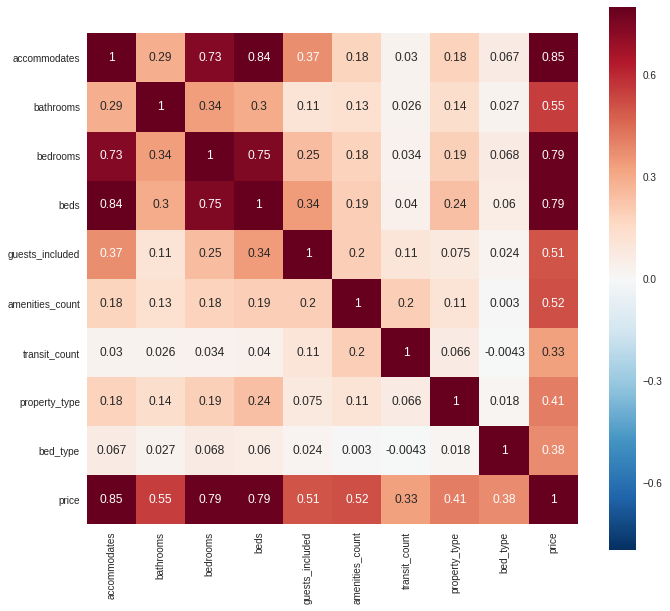

In [0]:
corrmat = df.corr(method = 'spearman')

f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1)

fig1 = sns.heatmap(corrmat, vmax=.8, square=True, annot=True,)


###From the above heatmap and correlation coefficients, we learn that, bedrooms and accomodates have a high correlation of 0.73 which makes sense since more the number of bedrooms, the more people can be accomodated. Also, we can see that, bedrooms can beds have a high correlation of 0.75, since more the bedrooms more the number of beds. And the same can be said about accomodates and beds (0.84). Apart from these 3 features, all other features are weakly correlated(correlation coefficeint < 0.5) and a comparatively higher correlation with target variable price , which is great because lower covariance/correlation and higher variance is desirable. Our new derived features , transit_count and amenities_count have a correlation coefficient of 0.33 and 0.52 respectively with the target variable price.

##Pairplot representation of different features with price

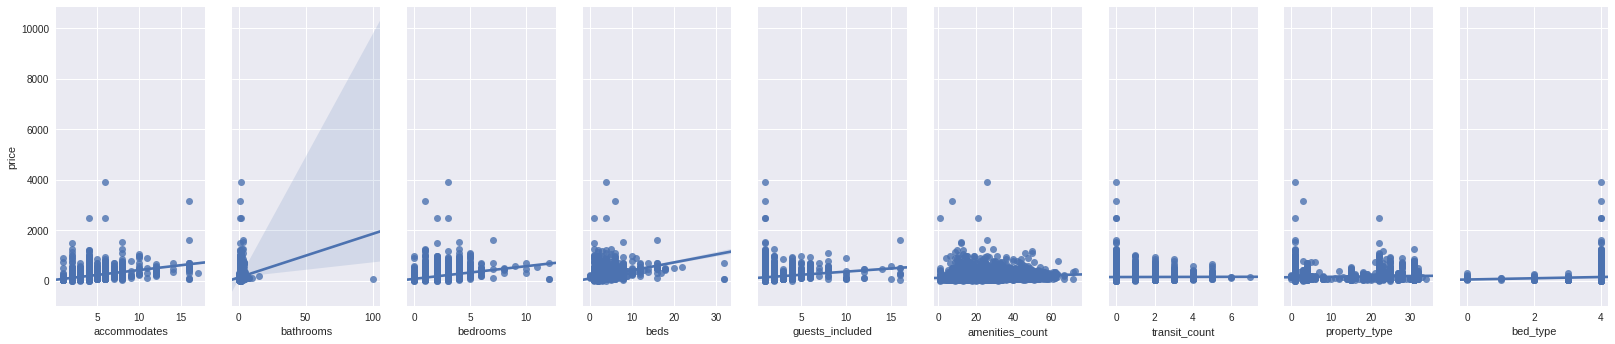

In [0]:
sns.pairplot(df,x_vars=list(df)[:-1], y_vars=list(df)[-1], size=5, aspect=0.5, kind='reg')

###The above pairplot representation gives us a picture of the feature values against price values . It also gives us and idea of the spread of every feature and the frequency of different values. In general, we can see that there is a genral trend in each graph and there are a few points away from the general trend which can either indicate outlier or it can mean that those points have certain other fetaures which contribute to their higher price. For eg :- Looking at the graph of accomodates versus price, we can see that the different values in accomodates varies from 1 to 17 (approx.). Also, the region around 2 to 8 is more dense indicating higher frequency around those values, which makes sense since most of the listings are from 2 to max 7 or 8 people.

###One hot encoding of categorical data -
###Representation of categorical variables as binary vectors. This first requires that the ###categorical values be mapped to integer values. Then, each integer value is represented as a binary vector that is all zero values except the index of the integer, which is marked with a 1.
###For eg :- The feature, property_type has values like Apartment, Townhouse, Guest Suite, Boat house , etc. If these features are just converted into labels then their value does not contribute to the price of the listing. But if we have a different column for each property_type. Then the presence or absence of that property_type attribute can be useful in predicting the price.

In [0]:
df.head(1)

,accommodates,bathrooms,bedrooms,beds,guests_included,amenities_count,transit_count,price
0,2,1.5,1.0,2.0,1,35,2,69.0


In [0]:
df_dummies =pd.get_dummies(df_categorical_columns)
df = df.drop(columns=['street','property_type','room_type','bed_type'])
df = pd.concat([df,df_dummies], axis=1)

df['price']=df.pop('price')

In [0]:
df.head(1)

,accommodates,bathrooms,bedrooms,beds,guests_included,amenities_count,transit_count,price,"street_1015 SN Amsterdam, Noord-Holland, Netherlands","street_Amstelveen, NH, Netherlands",...,property_type_Windmill,property_type_Yurt,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed
0,2,1.5,1.0,2.0,1,35,2,69.0,0,0,...,0,0,0,1,0,0,0,0,0,1


###Dimensionality reduction using PCA algorithm :-
###If we try to fit all of the 159 columns into our model, it will lead to overfitting of the model. Also, these new vectors are majorly sparse. So to avoid this problem and to shrink the number of attributes, we use the Dimensionality reduction method - PCA algorithm. It uses the concept of eigen values and eigen vectors to find new orthogonal vectors which have minimum covariance between them but high variance ,still keeping the effect of each column. We converted these 159 columns to 12 orthogonal vectors.

In [0]:
X = df.iloc[:,:-1]

pca = PCA(n_components=12)
X_new = pca.fit_transform(X)
new_df = pd.DataFrame(data=X_new)

new_df['price'] = df['price']

#Model Performance

###Most of the features were nominal or categorical. Also the features like bedroom which was numerical. But the number of bedrooms itself can be considered as a category. So in case of categorical data, the best regressor models were Decision tree regressor or Naive Bayes . But for Naive Bayes, it is necessary that the features are mutually exclusive(strictly independent of each other). So we did not use Naive Bayes. In case of SVM, the regressor boundary is influenced by support vectors which are closest to the margin. But in case of Airbnb listings, so outliers can badly affect the model. We can use softmax to solve this problem, but still we needed a model which is based on the entire range of data and not just a few points alone. 
###In case of decision tree regressor model, we can have  a more general model to cover the data. Also, the outlier data and overfitting can be handled effectively by pruning methods as well as setting the max_depth, max_leaf_nodes which prevents the model to overfit.
###Parameters : For max_depth we took it as 10, since we had 12 orthogonal vectors after PCA, to avoid overfitting we paved way for only 10 features along the depth instead of 12. We have kept the min_impurity_split to a low value 20, again to ensure that the model does not overfit.

##Model Performance by Decision Tree Regressor

In [0]:

kf = KFold(n_splits=5)

regr = DecisionTreeRegressor(criterion='mse', max_depth=10,
           max_leaf_nodes=500,
           min_impurity_split=20, min_samples_leaf=1,
           min_samples_split=2,
           random_state=0, splitter='best')

X = np.array(new_df.iloc[:,:-1])
y = np.array(new_df.iloc[:,-1])

X,y = shuffle(X, y, random_state=0)
MSE = []
MAE = []
c = 1

print 'For Decision Tree Regressor,\n'
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  regr.fit(X_train, y_train)
  
  y_pred_test = regr.predict(X_test)


  MSE.append(mean_squared_error(y_test,y_pred_test))
  MAE.append(abs(y_test-y_pred_test).sum()/y_test.shape[0])
  print 'For fold = {}, Mean Squared error (MSE) = {}'.format(c,mean_squared_error(y_test,y_pred_test))
  print 'For fold = {}, Mean absolute error (MAE) = {}'.format(c,abs(y_test-y_pred_test).sum()/y_test.shape[0])
  print '\n'
print 'Average Mean Squared error (MSE) over all {} splits = {}'.format(kf.n_splits,np.average(MSE))
print 'Average Mean absolute error (MAE) over all {} splits = {}'.format(kf.n_splits,np.average(MAE))
  

For Decision Tree Regressor,

For fold = 1, Mean Squared error (MSE) = 1584.92233797
For fold = 1, Mean absolute error (MAE) = 18.2808706736


For fold = 2, Mean Squared error (MSE) = 1536.43224105
For fold = 2, Mean absolute error (MAE) = 17.9106056744


For fold = 3, Mean Squared error (MSE) = 1817.50480255
For fold = 3, Mean absolute error (MAE) = 14.6837061971


For fold = 4, Mean Squared error (MSE) = 1654.82932948
For fold = 4, Mean absolute error (MAE) = 18.5986869589


For fold = 5, Mean Squared error (MSE) = 1561.61377904
For fold = 5, Mean absolute error (MAE) = 13.958990037


Average Mean Squared error (MSE) over all 5 splits = 1631.06049802
Average Mean absolute error (MAE) over all 5 splits = 16.6865719082


### To improve the stability and decrease error, we use Bagging (Bootstrap Aggregation) which is a ensemble method which reduces the variance and helps to avoid overfitting.
###A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.The fundamental difference between bagging and random forest is that in Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node.
###While fitting in the Random Forest regressor model, we have taken n_estimators value as high as 500, because this makes predictions stronger and more stable.n_estimators is the number of trees we want to build before taking the maximum voting or averages of predictions.

##Model Performance by Random Forest Regressor (Bagging)

In [0]:

kf = KFold(n_splits=5)


regr = RandomForestRegressor(n_estimators=500, n_jobs=-1, max_depth=10)

X = np.array(new_df.iloc[:,:-1])
y = np.array(new_df.iloc[:,-1])

X,y = shuffle(X, y, random_state=0)
MSE = []
MAE = []

print 'For Random Forest Regressor, \n'

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  regr.fit(X_train, y_train)
  
  y_pred_test = regr.predict(X_test)


  MSE.append(mean_squared_error(y_test,y_pred_test))
  MAE.append(abs(y_test-y_pred_test).sum()/y_test.shape[0])
  print 'For fold = {}, Mean Squared error (MSE) = {}'.format(c,mean_squared_error(y_test,y_pred_test))
  print 'For fold = {}, Mean absolute error (MAE) = {}'.format(c,abs(y_test-y_pred_test).sum()/y_test.shape[0])
  print '\n'
  
print 'Average Mean Squared error (MSE) over all {} splits = {}'.format(kf.n_splits,np.average(MSE))
print 'Average Mean absolute error (MAE) over all {} splits = {}'.format(kf.n_splits,np.average(MAE))
  

For Random Forest Regressor, 

For fold = 1, Mean Squared error (MSE) = 1440.83848906
For fold = 1, Mean absolute error (MAE) = 16.6189733396


For fold = 2, Mean Squared error (MSE) = 1396.75658277
For fold = 2, Mean absolute error (MAE) = 16.2823687949


For fold = 3, Mean Squared error (MSE) = 1652.27709323
For fold = 3, Mean absolute error (MAE) = 14.0837061971


For fold = 4, Mean Squared error (MSE) = 1504.39029953
For fold = 4, Mean absolute error (MAE) = 16.9078972354


For fold = 5, Mean Squared error (MSE) = 1261.61377904
For fold = 5, Mean absolute error (MAE) = 13.758990037


Average Mean Squared error (MSE) over all 5 splits = 1491.17524873
Average Mean absolute error (MAE) over all 5 splits = 15.5503871208


###Boosting is turning weak learners into strong learners.Boosting trains each learner, but instances that were misclassified by the previous learners are given more weight so that subsequent learners give more focus to them during training.Boosting focuses new learners on examples that gave high errors. Boosting trains learners sequentially.
###XGBoost stands for eXtreme Gradient Boosting.XGBoost is really fast when compared to other implementations of gradient boosting.XGBoost dominates structured or tabular datasets on classification and regression predictive modeling problems.It implements the gradient boosting decision tree algorithm designed for speed and performance.

###For XGBoost parameters, we keep the eta as low as 0.25 to avoid overfitting. We use gbtree as the booster to use tree based models instead of linear functions. Gamma stands for Minimum loss reduction required to make a further partition on a leaf node of the tree. We have kept gamma value to 2 so that the model is not too conservative. We have set Subsample ratio to 0.7 ,means that XGBoost would randomly sample 70% of the training data prior to growing trees. and this will prevent overfitting. Subsampling will occur once in every boosting iteration.

##Model Performance by XGBoost Regressor (Boosting)

In [0]:

kf = KFold(n_splits=5)

regr = XGBRegressor(random_state=0,booster='gbtree',eta=0.25,max_depth=10,subsample= 0.7,colsample_bytree = 1,gamma= 2)


X = np.array(new_df.iloc[:,:-1])
y = np.array(new_df.iloc[:,-1])

X,y = shuffle(X, y, random_state=0)


print 'For XGBoost Regressor, \n'

MSE = []
MAE = []

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  regr.fit(X_train, y_train)
  
  y_pred_test = regr.predict(X_test)

  MSE.append(mean_squared_error(y_test,y_pred_test))
  MAE.append(abs(y_test-y_pred_test).sum()/y_test.shape[0])
  print 'For fold = {}, Mean Squared error (MSE) = {}'.format(c,mean_squared_error(y_test,y_pred_test))
  print 'For fold = {}, Mean absolute error (MAE) = {}'.format(c,abs(y_test-y_pred_test).sum()/y_test.shape[0])
  print '\n'
print 'Average Mean Squared error (MSE) over all {} splits = {}'.format(kf.n_splits,np.average(MSE))
print 'Average Mean absolute error (MAE) over all {} splits = {}'.format(kf.n_splits,np.average(MAE))
  

For XGBoost Regressor, 

For fold = 1, Mean Squared error (MSE) = 1320.76861497
For fold = 1, Mean absolute error (MAE) = 15.2340588946


For fold = 2, Mean Squared error (MSE) = 1280.36020087
For fold = 2, Mean absolute error (MAE) = 14.9255047287


For fold = 3, Mean Squared error (MSE) = 1514.58733546
For fold = 3, Mean absolute error (MAE) = 13.7837061971


For fold = 4, Mean Squared error (MSE) = 1379.02444123
For fold = 4, Mean absolute error (MAE) = 15.4989057991


For fold = 5, Mean Squared error (MSE) = 1140.61377904
For fold = 5, Mean absolute error (MAE) = 13.668990037


Average Mean Squared error (MSE) over all 5 splits = 1354.60882587
Average Mean absolute error (MAE) over all 5 splits = 14.6822331313


###In our case Boosting performed better than Bagging since  Boosting could generate a combined model with lower errors as it optimises the advantages and reduces pitfalls when we use a single model and not a variety.